In [1]:
from __future__ import print_function
%matplotlib inline
from pylab import *


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import skimage
from skimage import *
from skimage.color import *
import numpy as np
plt.style.use('dark_background')

from IPython.core.debugger import set_trace

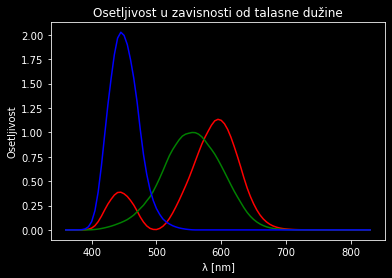

In [2]:
from numpy import genfromtxt
my_data = genfromtxt('StdObsFuncs2.csv', delimiter=',');

wave_length = my_data[:, 0];
xbar = my_data[:, 1];
ybar = my_data[:, 2];
zbar = my_data[:, 3];

figure();
title_obj = title("Osetljivost u zavisnosti od talasne dužine");
plt.setp(title_obj, color='w');

xlabel("λ [nm]");
ylabel("Osetljivost");
plot(wave_length, xbar, 'r');
plot(wave_length, ybar, 'g');
plot(wave_length, zbar, 'b');

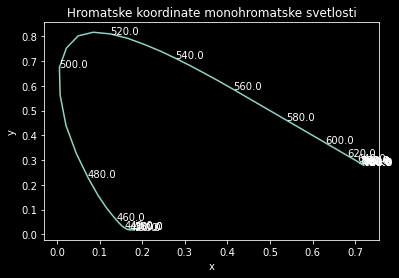

In [3]:
x = xbar / (xbar + ybar + zbar)
y = ybar / (xbar + ybar + zbar)

figure()
title("Hromatske koordinate monohromatske svetlosti")
xlabel("x")
ylabel("y")
plot(x,y);
for j in range(0, len(wave_length), 4):
    text( x[j], y[j], str(wave_length[j]) )

In [4]:
my_data = genfromtxt('StdObsFuncs2.csv', delimiter=',')

wave_length = my_data[:, 0]*1e-9
xbar = my_data[:, 1]
ybar = my_data[:, 2]
zbar = my_data[:, 3]
    
std_observer = (wave_length, xbar, ybar, zbar)


from scipy.constants import c, h, k

def zracenje_crnog_tela(std_observer, T=6500):
    
    wave_length = std_observer[0]
    xbar = std_observer[1]
    ybar = std_observer[2]
    zbar = std_observer[3]
    
    
    I = 2*h*c**2/(wave_length**5) * 1/( exp(h*c/(wave_length*k*T)) - 1 ) 
    
    figure(); plot(wave_length*1e9, I);
    plt.title('Zracenje crnog tela')
    plt.xlabel("talasna duzina"); plt.ylabel("intenzitet")

    Xr = sum(I*xbar)
    #set_trace()
    Yr = sum(I*ybar)
    Zr = sum(I*zbar)

    Xrn = Xr/(Xr+Yr+Zr);
    Yrn = Yr/(Xr+Yr+Zr);
    Zrn = Zr/(Xr+Yr+Zr);
    #set_trace()
    point = np.zeros((1,1,3))
    #set_trace()
    point[0][0][0] = Xrn
    point[0][0][1] = Yrn
    point[0][0][2] = Zrn
    #Irgb = xyz2rgb([Xrn, Yrn, Zrn])
    Irgb = xyz2rgb(point)
    Jrgb = np.zeros((100,100,3))
    print(Irgb)
    Jrgb[:,:,0] = Irgb[0][0][0];
    Jrgb[:,:,1] = Irgb[0][0][1];
    Jrgb[:,:,2] = Irgb[0][0][2];
    figure(); imshow(Jrgb);
    
    return T


In [5]:
interact(zracenje_crnog_tela, std_observer = fixed(std_observer), T=(1000,10000,100));

interactive(children=(IntSlider(value=6500, description='T', max=10000, min=1000, step=100), Output()), _dom_c…

In [ ]:
n
